In [18]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
legend_properties = {'weight':'bold'}

In [19]:
data_folder = r"E:\data\dao-0310-23\V4_4\TurbulenceFreq_1"
dao_performance_file = data_folder + r"\dao_performance_across_turbulence"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turbulence"
autonomy_performance_file = data_folder + r"\autonomy_performance_across_turbulence"

consensus_performance_file = data_folder + r"\consensus_performance_across_turbulence"
superior_performance_file = data_folder + r"\superior_performance_across_turbulence"

dao_diversity_file = data_folder + r"\dao_diversity_across_turbulence"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turbulence"
autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turbulence"

dao_variance_file = data_folder + r"\dao_variance_across_turbulence"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turbulence"
autonomy_variance_file = data_folder + r"\autonomy_variance_across_turbulence"


dao_original_performance_file = data_folder + r"\dao_performance_across_turbulence_time"
hierarchy_original_performance_file = data_folder + r"\hierarchy_performance_across_turbulence_time"
autonomy_original_performance_file = data_folder + r"\autonomy_performance_across_turbulence_time"

dao_original_diversity_file = data_folder + r"\dao_diversity_across_turbulence_time"
hierarchy_original_diversity_file = data_folder + r"\hierarchy_diversity_across_turbulence_time"
autonomy_original_diversity_file = data_folder + r"\autonomy_diversity_across_turbulence_time"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(autonomy_diversity_file, 'rb') as infile:
    autonomy_diversity = pickle.load(infile)

with open(consensus_performance_file, 'rb') as infile:
    consensus_performance = pickle.load(infile)
with open(superior_performance_file, 'rb') as infile:
    superior_performance = pickle.load(infile)

with open(dao_original_performance_file, 'rb') as infile:
    dao_original_performance = pickle.load(infile)
with open(hierarchy_original_performance_file, 'rb') as infile:
    hierarchy_original_performance = pickle.load(infile)
with open(autonomy_original_performance_file, 'rb') as infile:
    autonomy_original_performance = pickle.load(infile)

with open(dao_original_diversity_file, 'rb') as infile:
    dao_original_diversity = pickle.load(infile)
with open(hierarchy_original_diversity_file, 'rb') as infile:
    hierarchy_original_diversity = pickle.load(infile)
with open(autonomy_original_diversity_file, 'rb') as infile:
    autonomy_original_diversity = pickle.load(infile)

In [20]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

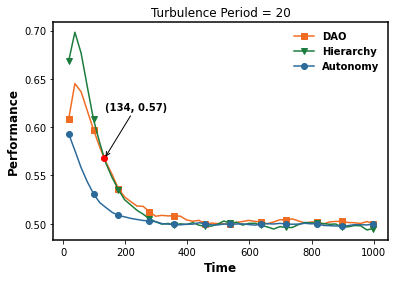

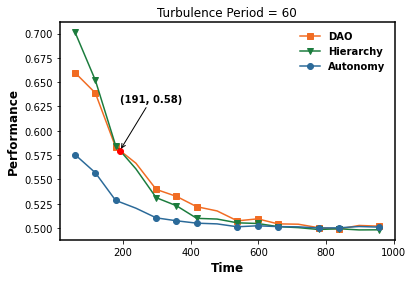

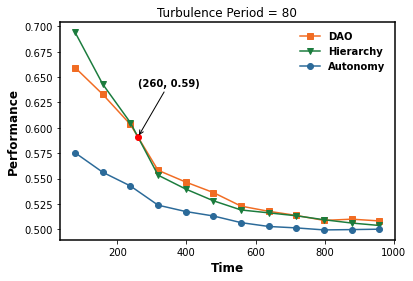

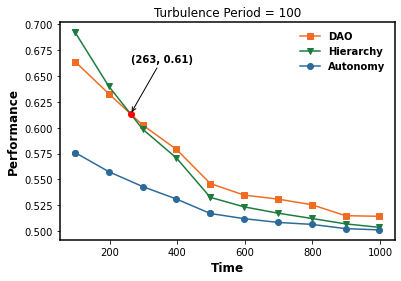

In [21]:
turbulence_freq_list = [20, 60, 80, 100]
for curve_index in range(len(turbulence_freq_list)):
    period = turbulence_freq_list[curve_index]
    x = range(len(dao_original_performance[curve_index]))
    # plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
    # plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
    # plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
    # selected grey background
    periods = np.arange(period - 2, 1000, period)
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    grey_dao_performance = [each for index, each in enumerate(dao_original_performance[curve_index]) if index in periods]
    grey_hierarchy_performance = [each for index, each in enumerate(hierarchy_original_performance[curve_index]) if index in periods]
    grey_autonomy_performance = [each for index, each in enumerate(autonomy_original_performance[curve_index]) if index in periods]
    # print(grey_autonomy_performance)
    # Define the number of markers you want (e.g., 5)
    num_markers = 12
    # Calculate indices for marker positions
    marker_positions = np.linspace(0, len(periods) - 1, num=num_markers, dtype=int)
    plt.plot(periods, grey_dao_performance, '-s', color=nature_orange, label="DAO", markevery=marker_positions)
    plt.plot(periods, grey_hierarchy_performance, '-v', color=nature_green, label="Hierarchy", markevery=marker_positions)
    plt.plot(periods, grey_autonomy_performance, '-o', color=nature_blue, label="Autonomy", markevery=marker_positions)

    plt.xlabel('Time', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)

    # Plot the intersections
    # Find the intersection points between the two lines
    line1_x = periods
    line2_x = periods
    line1_y = grey_dao_performance
    line2_y = grey_hierarchy_performance
    end_flag = False
    for i in range(len(line1_x) - 1):
        if end_flag:
            break
        for j in range(len(line2_x) - 1):
            x1 = line1_x[i]
            y1 = line1_y[i]
            x2 = line1_x[i+1]
            y2 = line1_y[i+1]
            x3 = line2_x[j]
            y3 = line2_y[j]
            x4 = line2_x[j+1]
            y4 = line2_y[j+1]

            # Calculate the slope and y-intercept of each line segment
            m1 = (y2 - y1) / (x2 - x1)
            b1 = y1 - m1 * x1
            m2 = (y4 - y3) / (x4 - x3)
            b2 = y3 - m2 * x3

            # Calculate the intersection point of the two line segments
            if m1 != m2:
                x_int = (b2 - b1) / (m1 - m2)
                y_int = m1 * x_int + b1

                # Check if the intersection point lies within the x-range and y-range of both line segments
                if (min(x1,x2) <= x_int <= max(x1,x2) and
                    min(y1,y2) <= y_int <= max(y1,y2) and
                    min(x3,x4) <= x_int <= max(x3,x4) and
                    min(y3,y4) <= y_int <= max(y3,y4)):

                    # Plot the intersection point
                    plt.plot(x_int, y_int, 'ro')
                    # Add a note to the point
                    arrow = plt.annotate('({0}, {1})'.format(math.ceil(x_int), '%.2f'%y_int), xy=(x_int, y_int), xytext=(x_int+1, y_int+0.05), arrowprops=dict(arrowstyle="->", facecolor='black'), weight="bold")
                    end_flag =True
                    break # only plot the first one
    plt.title("Turbulence Period = {0}".format(turbulence_freq_list[curve_index]))
    plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
    plt.savefig(data_folder + r"\F{0}_Turbulence_performance.png".format(turbulence_freq_list[curve_index]),
                transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    # plt.clf()

<ipython-input-16-4bb47d6a1a9e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
<ipython-input-16-4bb47d6a1a9e>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
<ipython-input-16-4bb47d6a1a9e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend

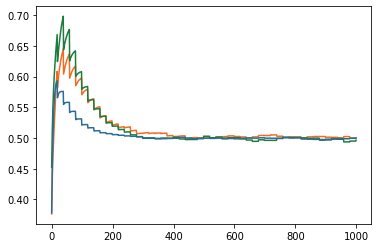

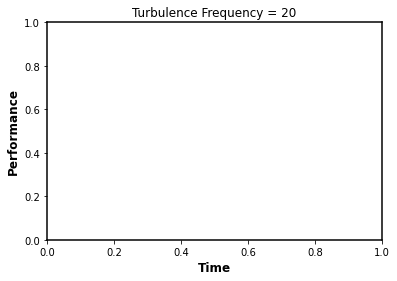

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


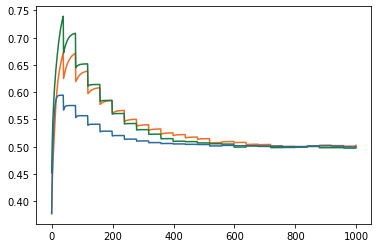

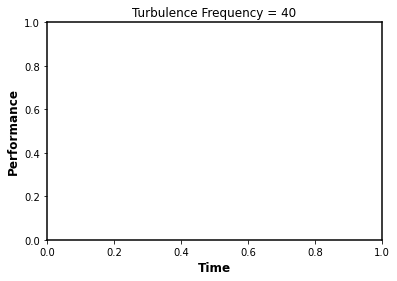

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


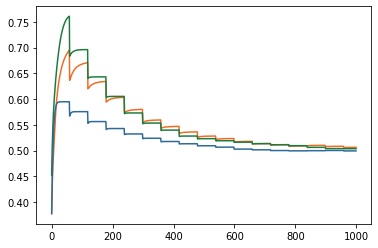

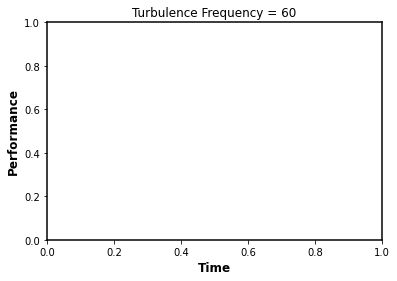

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


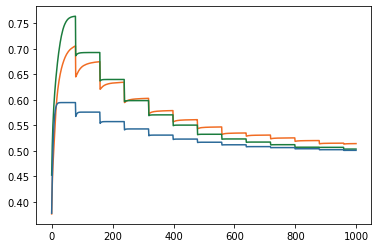

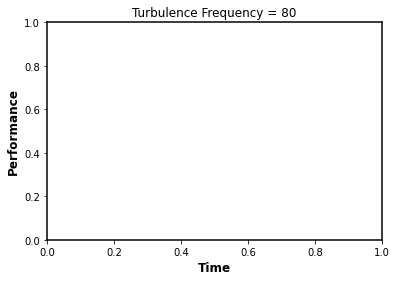

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


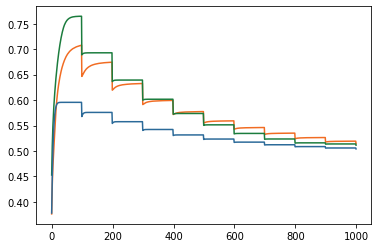

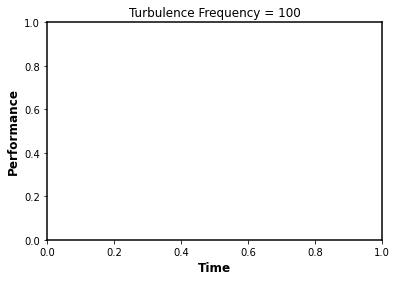

<Figure size 432x288 with 0 Axes>

In [16]:
turbulence_freq_list = [20, 40, 60, 80, 100]
for curve_index in range(len(turbulence_freq_list)):
    period = turbulence_freq_list[curve_index]
    x = range(len(dao_original_performance[curve_index]))
    plt.plot(x, dao_original_performance[curve_index], "k-", color=nature_orange, label="DAO")
    plt.plot(x, hierarchy_original_performance[curve_index], "k-", color=nature_green, label="Hierarchy")
    plt.plot(x, autonomy_original_performance[curve_index], "k-", color=nature_blue, label="Autonomy")
    # selected grey background
    periods = np.arange(period-2, 1000, period)
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    grey_dao_performance = [each for index, each in enumerate(dao_original_performance[curve_index]) if index in periods]
    grey_hierarchy_performance = [each for index, each in enumerate(hierarchy_original_performance[curve_index]) if index in periods]
    grey_autonomy_performance = [each for index, each in enumerate(autonomy_original_performance[curve_index]) if index in periods]
    # print(grey_autonomy_performance)
    # plt.plot(periods, grey_dao_performance, 'k-', color=nature_orange, label="DAO")
    # plt.plot(periods, grey_hierarchy_performance, 'k-', color=nature_green, label="Hierarchy")
    # plt.plot(periods, grey_autonomy_performance, 'k-', color=nature_blue, label="Autonomy")

    plt.xlabel('Time', fontweight='bold', fontsize=12)
    plt.ylabel('Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("Turbulence Frequency = {0}".format(turbulence_freq_list[curve_index]))
    plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
    plt.savefig(data_folder + r"\F{0}_Turbulence_performance.png".format(turbulence_freq_list[curve_index]),
                transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()